In [42]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [43]:
# Lode the Dataset
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Display First Few Rows
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [45]:
#Check for duplicates

data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [46]:
#Summary Statistics of numrical columns 
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [47]:
# checking for nulls and treating them.

data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [48]:
data.isnull().sum()/len(data)*100

Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64

In [49]:
# Dropping the unnecessary columns from the model.

data.drop(columns=['Person ID', 'Occupation', 'BMI Category'], inplace=True)

# Data Reduction

In [51]:
# reset index after dropping rows

data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Quality of Sleep         374 non-null    int64  
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   Blood Pressure           374 non-null    object 
 7   Heart Rate               374 non-null    int64  
 8   Daily Steps              374 non-null    int64  
 9   Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 29.3+ KB


# Feature Engineering

In [53]:
# Creating an Age Group feature
data['Age Group'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

# Displaying the transformed dataset
data.head()


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group
0,Male,27,6.1,6,42,6,126/83,77,4200,NaN,18-30
1,Male,28,6.2,6,60,8,125/80,75,10000,NaN,18-30
2,Male,28,6.2,6,60,8,125/80,75,10000,NaN,18-30
3,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,18-30
4,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,18-30


In [54]:
# Sleep Health Score (higher is better sleep)
data['Sleep Health Score'] = data['Sleep Duration'] * data['Quality of Sleep']

# Display the transformed dataset
data.head()


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group,Sleep Health Score
0,Male,27,6.1,6,42,6,126/83,77,4200,NaN,18-30,36.6
1,Male,28,6.2,6,60,8,125/80,75,10000,NaN,18-30,37.2
2,Male,28,6.2,6,60,8,125/80,75,10000,NaN,18-30,37.2
3,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,18-30,23.6
4,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,18-30,23.6


# average sleep duration across different age groups?

In [56]:
# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 100]  # Adjust bins as needed
age_labels = ['18-30', '31-40', '41-50', '51-60', '61+']

# Create a new column 'Age Group' based on the age bins
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)


In [57]:
# Calculate average sleep duration for each age group
avg_sleep_by_age_group = data.groupby('Age Group')['Sleep Duration'].mean()

# Display the result
avg_sleep_by_age_group


Age Group
18-30    6.468421
31-40    7.066901
41-50    6.909402
51-60    7.631250
61+           NaN
Name: Sleep Duration, dtype: float64

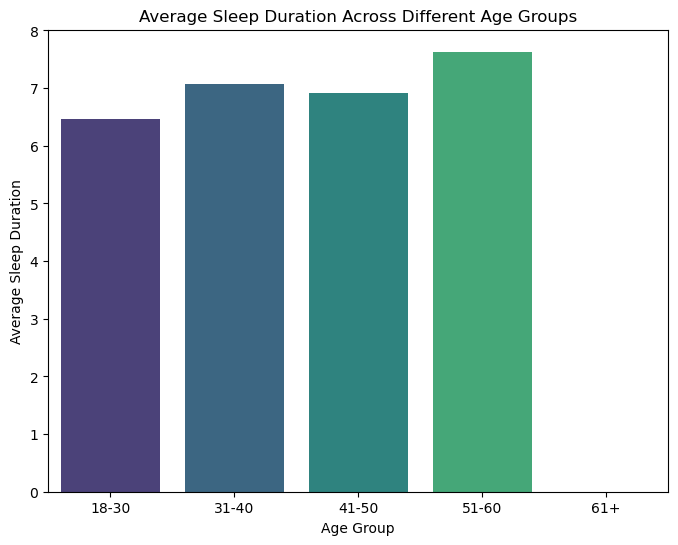

In [58]:
# Plot the average sleep duration by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sleep_by_age_group.index, y=avg_sleep_by_age_group.values, palette='viridis')
plt.title('Average Sleep Duration Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Duration')
plt.show()


# correlation between stress level and quality of sleep?

In [60]:
# Calculate the correlation between Stress Level and Quality of Sleep
correlation = data['Stress Level'].corr(data['Quality of Sleep'])

print(f"Correlation between Stress Level and Quality of Sleep: {correlation:.2f}")


Correlation between Stress Level and Quality of Sleep: -0.90


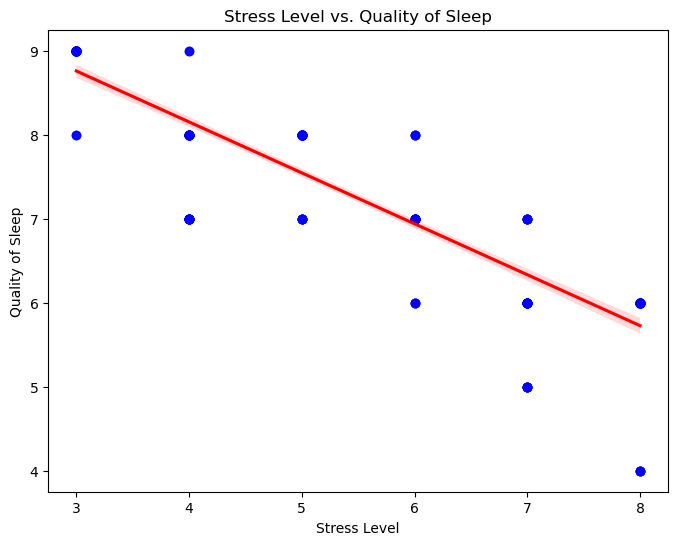

In [61]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Stress Level', y='Quality of Sleep', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Stress Level vs. Quality of Sleep")
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.show()


# Does gender have a significant impact on sleep duration or quality

In [63]:
# Average sleep duration and quality of sleep by gender
avg_sleep_by_gender = data.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean()
avg_sleep_by_gender


,Sleep Duration,Quality of Sleep
Gender,,
Female,7.229730,7.664865
Male,7.036508,6.968254


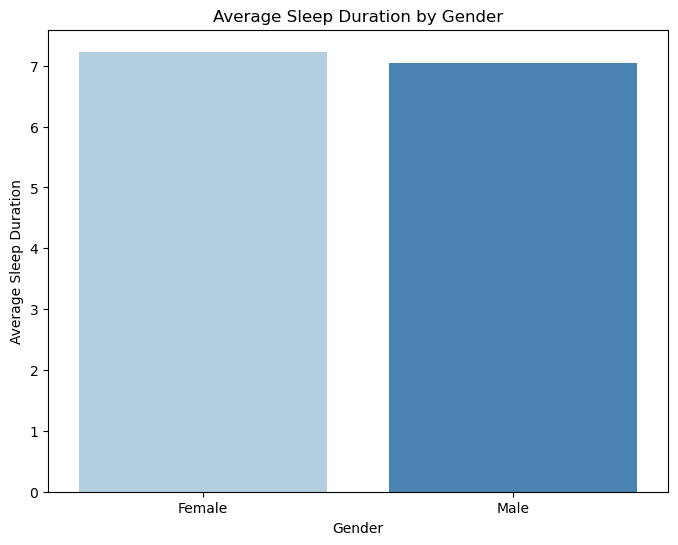

In [64]:
# Plot average sleep duration by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sleep_by_gender.index, y=avg_sleep_by_gender['Sleep Duration'], palette='Blues')
plt.title('Average Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sleep Duration')
plt.show()



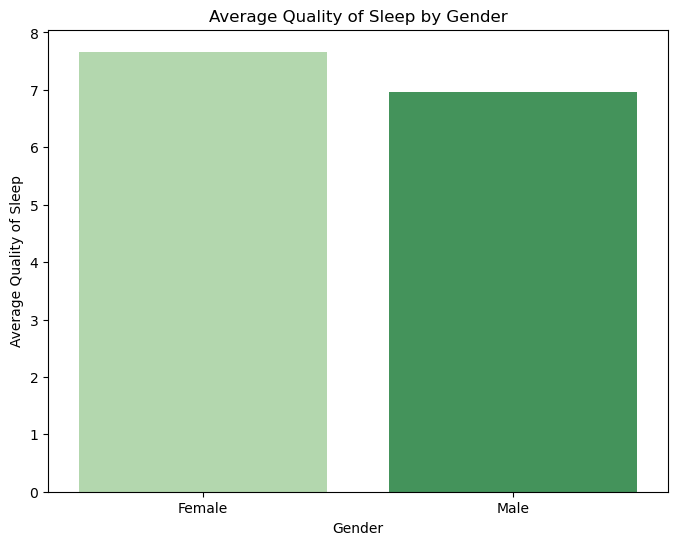

In [65]:
# Plot average quality of sleep by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sleep_by_gender.index, y=avg_sleep_by_gender['Quality of Sleep'], palette='Greens')
plt.title('Average Quality of Sleep by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Quality of Sleep')
plt.show()

# How does physical activity affect sleep quality

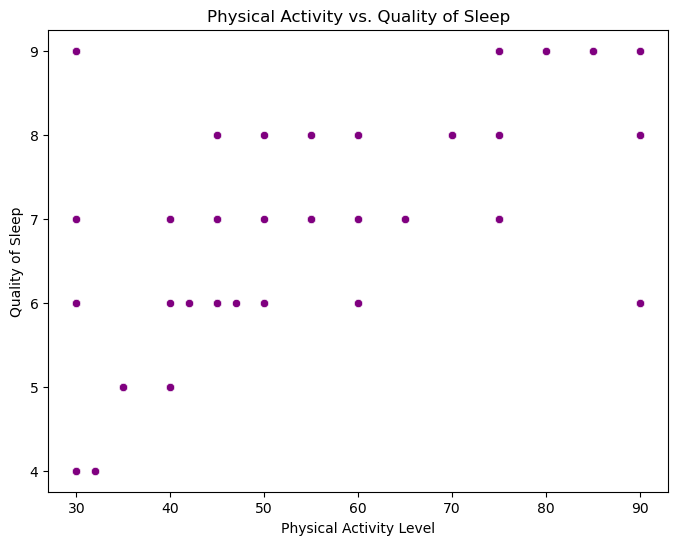

In [67]:
# Scatter plot to visualize the relationship between Physical Activity and Sleep Quality
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=data, color='purple')
plt.title('Physical Activity vs. Quality of Sleep')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.show()


In [68]:
# Calculate the correlation between Physical Activity Level and Quality of Sleep
correlation = data['Physical Activity Level'].corr(data['Quality of Sleep'])

print(f"Correlation between Physical Activity and Quality of Sleep: {correlation:.2f}")


Correlation between Physical Activity and Quality of Sleep: 0.19


In [69]:
# Define categories for physical activity levels
bins = [0, 30, 60, np.inf]
labels = ['Low', 'Moderate', 'High']
data['Physical Activity Level Category'] = pd.cut(data['Physical Activity Level'], bins=bins, labels=labels, right=False)


In [70]:
# Calculate average sleep quality by physical activity level category
avg_sleep_by_activity = data.groupby('Physical Activity Level Category')['Quality of Sleep'].mean()
avg_sleep_by_activity

Physical Activity Level Category
Low              NaN
Moderate    6.807453
High        7.694836
Name: Quality of Sleep, dtype: float64

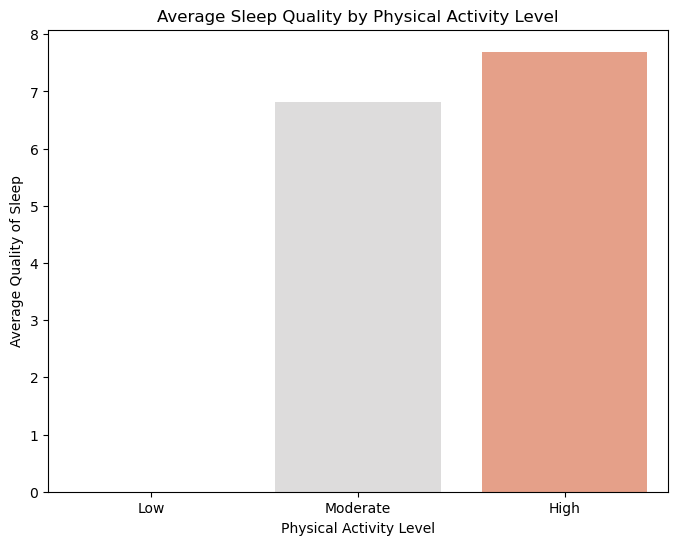

In [71]:
# Plot average sleep quality by physical activity level category
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sleep_by_activity.index, y=avg_sleep_by_activity.values, palette='coolwarm')
plt.title('Average Sleep Quality by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Average Quality of Sleep')
plt.show()

# Correlation Analysis

In [73]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [74]:
correlation_matrix = numerical_data.corr()

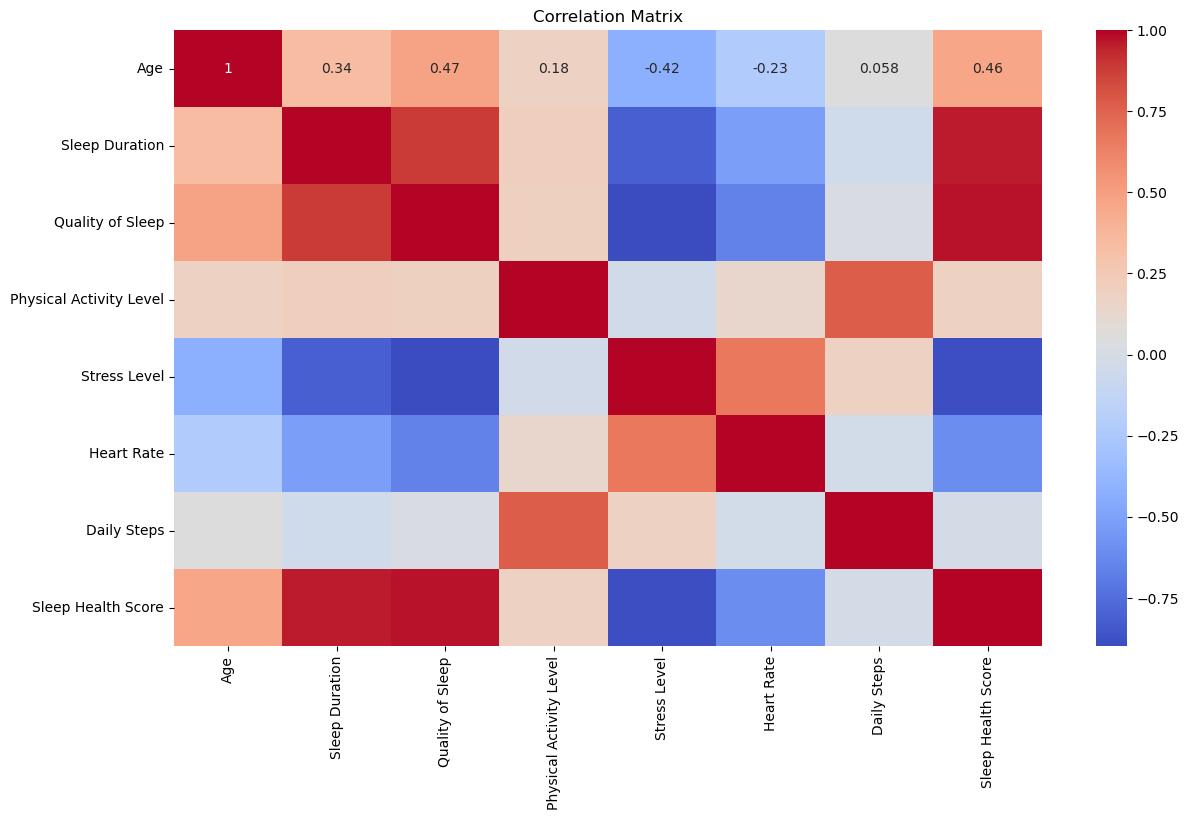

In [76]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


-Sleep Duration Distribution: Identify common sleep patterns and outliers.
-Stress Levels by Sleep Disorder: Explore the relationship between stress levels and sleep disorders.
-Sleep Quality vs Sleep Duration: Examine the correlation between sleep duration and quality.
-Sleep Disorders by Gender: Investigate if sleep disorders are more prevalent in a specific gender.
-Physical Activity and Sleep Quality: Analyze how physical activity levels impact sleep quality.
-Correlation Analysis: Identify significant correlations between sleep metrics, stress levels, physical activity, and cardiovascular health.
